In [1]:
#import dependencies

import requests
import json
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import csv
import random as rand
from config import api_key

# Save url information.
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&lat="

In [5]:
random_lat = round(rand.uniform(-90, 90),3)
random_long = round(rand.uniform(-180, 180),3)
print(random_lat, random_long)

-82.489 23.435


In [16]:
cities = []
latitudes = []
longitudes = []
temperatures = []
humid = []
cloud = []
wind = []


for i in range(500):
    random_lat = round(rand.uniform(-70, 70),4)
    random_long = round(rand.uniform(-100, 100),4)

    # Build partial query URL
    query_url = f"{url}{random_lat}&lon={random_long}&appid={api_key}"        

    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()

    #get metrics from weather data api to use in list
    name = weather_json["name"]
    lat = weather_json["coord"]["lat"]
    long = weather_json["coord"]["lon"]
    temperature = weather_json["main"]["temp"]
    humidity = weather_json["main"]["humidity"]
    cloudiness = weather_json["clouds"]["all"]
    wind_speed = weather_json["wind"]["speed"]

    #append values to individual lists to use in df
    cities.append(name)
    latitudes.append(lat)
    longitudes.append(long)
    temperatures.append(temperature)
    humid.append(humidity)
    cloud.append(cloudiness)
    wind.append(wind_speed)

In [17]:
df = pd.DataFrame({
    "City": cities, 
    "Lat": latitudes, 
    "Long": longitudes,
    "Temp": temperatures, 
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind": wind
})
#len(df)
df.head()

,City,Lat,Long,Temp,Humidity,Cloudiness,Wind
0,Endirey,43.1213,46.6529,30.31,98,100,4.00
1,Şumaymah,20.9690,39.0239,78.26,57,0,22.53
2,,-34.3716,-18.7845,74.97,84,42,30.18
3,,-27.9675,-39.1517,77.09,62,100,8.50
4,,32.3370,-53.9413,68.68,85,0,12.17


In [18]:
#The first requirement is to create a series of scatter plots to showcase the following relationships. 
#After each plot, add a sentence or two explaining what the code is analyzing.

#Temperature (F) vs. Latitude
#Humidity (%) vs. Latitude
#Cloudiness (%) vs. Latitude
#Wind Speed (mph) vs. Latitude

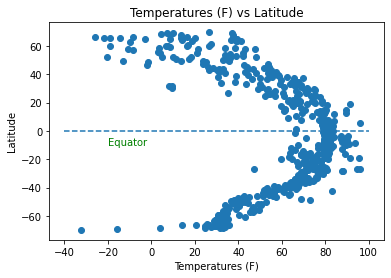

In [45]:
plt.scatter(df['Temp'],df['Lat'])
plt.xlabel("Temperatures (F)")
plt.ylabel("Latitude")
plt.title("Temperatures (F) vs Latitude")

x_coordinates = [-40, 100]
y_coordinates = [0, 0]
equator = plt.plot(x_coordinates, y_coordinates, linestyle="dashed", color="green")
plt.annotate("Equator",(-20,-10),fontsize=10,color="green")

plt.show()

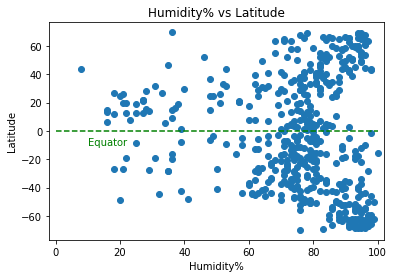

In [50]:
plt.scatter(df['Humidity'],df['Lat'])
plt.xlabel("Humidity%")
plt.ylabel("Latitude")
plt.title("Humidity% vs Latitude")
plt.xlim(-2, 102)

x_coordinates = [0, 100]
y_coordinates = [0, 0]
equator = plt.plot(x_coordinates, y_coordinates, linestyle="dashed", color="green")
plt.annotate("Equator",(10,-10),fontsize=10,color="green")

plt.show()

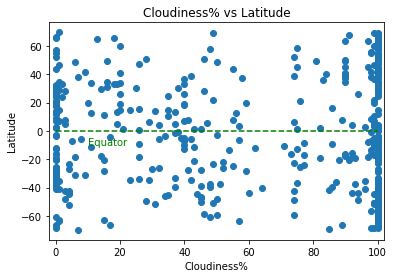

In [49]:
plt.scatter(df['Cloudiness'],df['Lat'])
plt.xlabel("Cloudiness%")
plt.ylabel("Latitude")
plt.title("Cloudiness% vs Latitude")
plt.xlim(-2, 102)

x_coordinates = [0, 100]
y_coordinates = [0, 0]
equator = plt.plot(x_coordinates, y_coordinates, linestyle="dashed", color="green")
plt.annotate("Equator",(10,-10),fontsize=10,color="green")


plt.show()

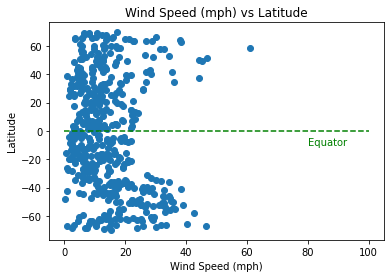

In [51]:
plt.scatter(df['Wind'],df['Lat'])
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title("Wind Speed (mph) vs Latitude")

x_coordinates = [0, 100]
y_coordinates = [0, 0]
equator = plt.plot(x_coordinates, y_coordinates, linestyle="dashed", color="green")
plt.annotate("Equator",(80,-10),fontsize=10,color="green")

plt.show()

In [52]:
#The second requirement is to run linear regression on each relationship. 
#This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) 
#and Southern Hemisphere (less than 0 degrees latitude).
#After each pair of plots, take the time to explain what the linear regression is modeling. 
#For example, describe any relationships you notice and any other analysis you may have.

#Northern Hemisphere - Temperature (F) vs. Latitude
#Southern Hemisphere - Temperature (F) vs. Latitude
#Northern Hemisphere - Humidity (%) vs. Latitude
#Southern Hemisphere - Humidity (%) vs. Latitude
#Northern Hemisphere - Cloudiness (%) vs. Latitude
#Southern Hemisphere - Cloudiness (%) vs. Latitude
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
#Southern Hemisphere - Wind Speed (mph) vs. Latitude

In [53]:
df_north = df.loc[df["Lat"]>=0]
#df_north.sort_values("Lat").head()
df_south = df.loc[df["Lat"]<0]
#df_south.sort_values("Lat").head()

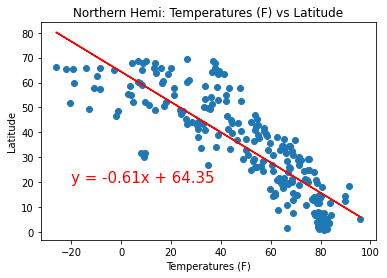

In [58]:
# Add the linear regression equation and line to plot
# Northern Hemisphere - Temperature (F) vs. Latitude

x_values = df_north['Temp']
y_values = df_north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,20),fontsize=15,color="red")
plt.xlabel("Temperatures (F)")
plt.ylabel("Latitude")
plt.title("Northern Hemi: Temperatures (F) vs Latitude")
plt.show()

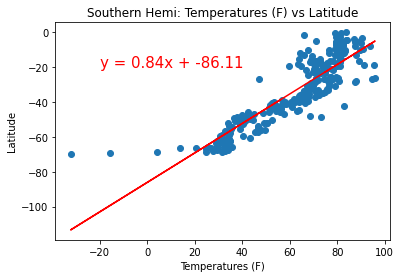

In [59]:
# Add the linear regression equation and line to plot
# Southern Hemisphere - Temperature (F) vs. Latitude

x_values = df_south['Temp']
y_values = df_south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,-20),fontsize=15,color="red")
plt.xlabel("Temperatures (F)")
plt.ylabel("Latitude")
plt.title("Southern Hemi: Temperatures (F) vs Latitude")
plt.show()

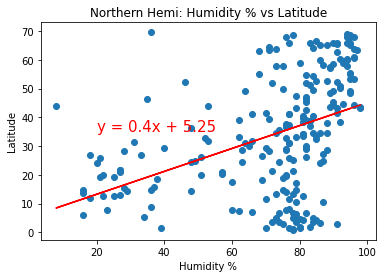

In [67]:
# Add the linear regression equation and line to plot
# Northern Hemisphere - Humidity (%) vs. Latitude

x_values = df_north['Humidity']
y_values = df_north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.xlabel("Humidity %")
plt.ylabel("Latitude")
plt.title("Northern Hemi: Humidity % vs Latitude")
plt.show()

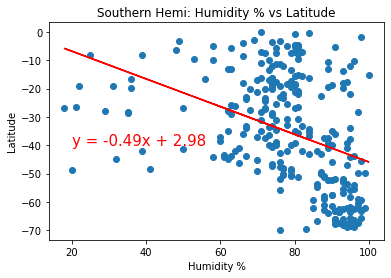

In [70]:
# Add the linear regression equation and line to plot
# Southern Hemisphere - Humidity (%) vs. Latitude

x_values = df_south['Humidity']
y_values = df_south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-40),fontsize=15,color="red")
plt.xlabel("Humidity %")
plt.ylabel("Latitude")
plt.title("Southern Hemi: Humidity % vs Latitude")
plt.show()

In [ ]:
#Your final notebook must:

#Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
#Perform a weather check on each of the cities using a series of successive API calls.
#Include a print log of each city as it's being processed with the city number and city name.
#Save a CSV of all retrieved data and a PNG image for each scatter plot.